In [298]:
from config import DBNAME
import pandas as pd 
import numpy as np
from tqdm import tqdm
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import sqlite3 

In [299]:
pd.set_option('display.max_columns', None)

In [300]:
# ====================
# БАЗОВЫЕ НАСТРОЙКИ
# ====================
plt.rcParams.update({
    # Размер и разрешение
    'figure.figsize': (10, 6),  # Ширина, высота в дюймах
    'figure.dpi': 100,          # Разрешение для экранов
    'savefig.dpi': 300,         # Разрешение для сохранения
    
    # Шрифты и текст
    'font.size': 12,
    'font.family': 'DejaVu Sans',  # Кроссплатформенный шрифт
    'axes.titlesize': 16,          # Заголовок графика
    'axes.labelsize': 14,          # Подписи осей
    'xtick.labelsize': 12,         # Метки оси X
    'ytick.labelsize': 12,         # Метки оси Y
    'legend.fontsize': 11,         # Легенда
    
    # Цвета и линии
    'axes.facecolor': 'white',     # Фон графика
    'figure.facecolor': 'white',   # Фон фигуры
    'axes.edgecolor': 'black',     # Цвет рамки
    'grid.color': '#e0e0e0',       # Цвет сетки
    
    # Оси и сетка
    'axes.grid': True,             # Отображать сетку
    'grid.linestyle': '--',        # Стиль сетки
    'grid.alpha': 0.7,             # Прозрачность сетки
    
    # Легенда
    'legend.frameon': True,        # Рамка вокруг легенды
    'legend.framealpha': 0.9,      # Прозрачность фона
    'legend.edgecolor': 'black',
    
    # Линии
    'lines.linewidth': 2,          # Толщина линий
    'lines.markersize': 8,         # Размер маркеров
    
    # Гистограммы
    'hist.bins': 'auto',           # Автовыбор корзин для гистограмм
})

In [301]:
TABLE_NAME = DBNAME

In [302]:
try:
    with sqlite3.connect(DBNAME) as conn:
        hh_df = pd.read_sql_query(f"SELECT * FROM full_sql", conn)
except Exception as e:
    print(f'❌ Ошибка: Загрузка данных из БД {e}')

In [303]:
hh_df.published_at = pd.to_datetime(hh_df.published_at)

In [304]:
hh_df.sample()

,vac_id,vac_name,grade,city,geo,geo_city,published_at,archived,employer_id,emp_name,addres,is_accredited,is_trusted,salary_from,salary_to,currency,gross,mode_name,frequency,prof_role,schedule_name,insider_interview,response_letter_required,experience,key_skills,has_test,url,parsed_for_job
822,122379519,Специалист по работе с базой данных и аналитике,Middle,Москва,"[55.777555, 37.649454]","[55.625578, 37.6063916]",2025-07-13 09:51:01+03:00,0,1026046,Полная занятость,"Москва, Каланчёвская улица, 16с1",0,1,104400.0,104400.0,RUR,1,За месяц,,Аналитик,Полный день,,0,От 1 года до 3 лет,Анализ данных; Статистический анализ; Английск...,0,https://hh.ru/vacancy/122379519,Аналитик данных


In [305]:
hh_df.salary_from.describe()


count      1010.000000
mean     122851.901267
std       70458.393754
min         250.000000
25%       70000.000000
50%      101787.360000
75%      160000.000000
max      500000.000000
Name: salary_from, dtype: float64

In [306]:
def capture_figures(title=None, xlabel=None, ylabel=None):
    plt.title(title) if title else plt.title('')
    plt.xlabel(xlabel) if xlabel else plt.xlabel('')
    plt.ylabel(ylabel) if ylabel else plt.ylabel('')
    plt.show()

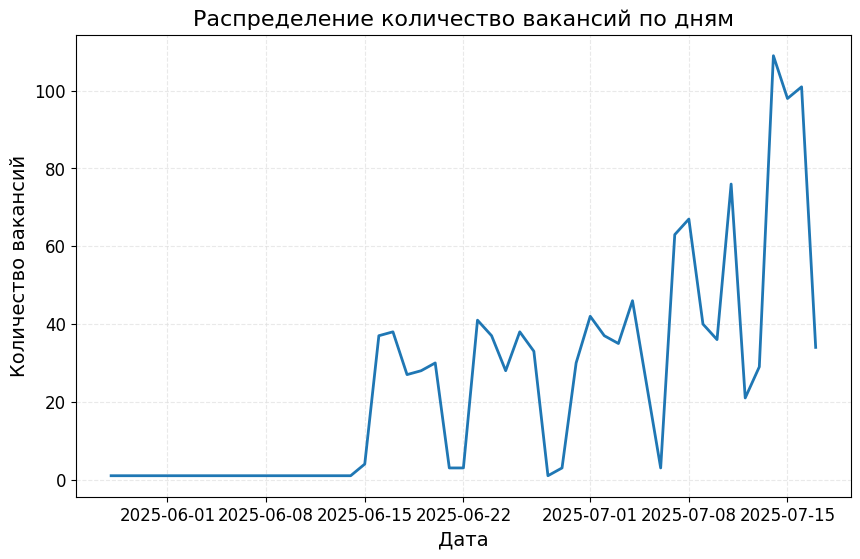

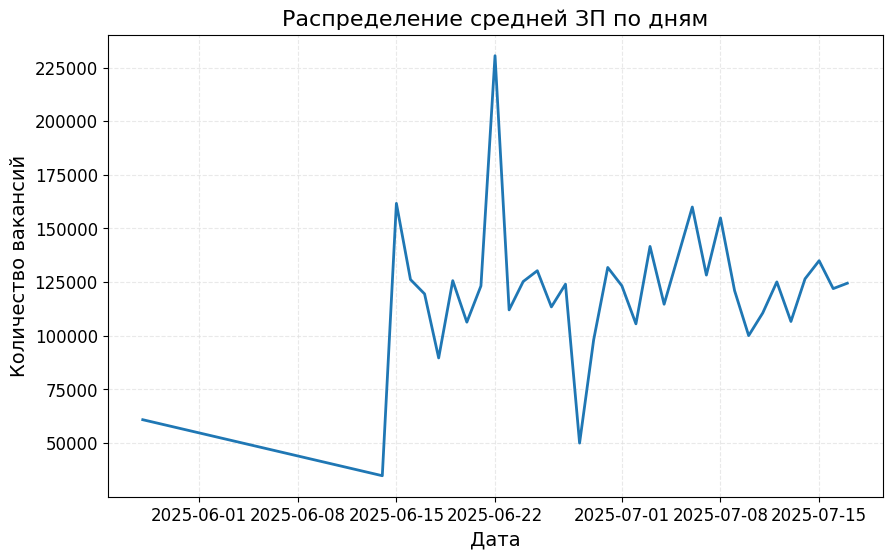

In [307]:
hh_df['j_date'] = hh_df.published_at.dt.date

temp = hh_df.groupby(['j_date']).agg(
    vac_count = ('vac_id','nunique'),
    mean_salary = ('salary_from','mean')
).reset_index().sort_values(by='j_date')


sns.lineplot(data=temp, x='j_date', y='vac_count')
capture_figures('Распределение количество вакансий по дням', 'Дата','Количество вакансий')

sns.lineplot(data=temp, x='j_date', y='mean_salary')
capture_figures('Распределение средней ЗП по дням', 'Дата','Количество вакансий')


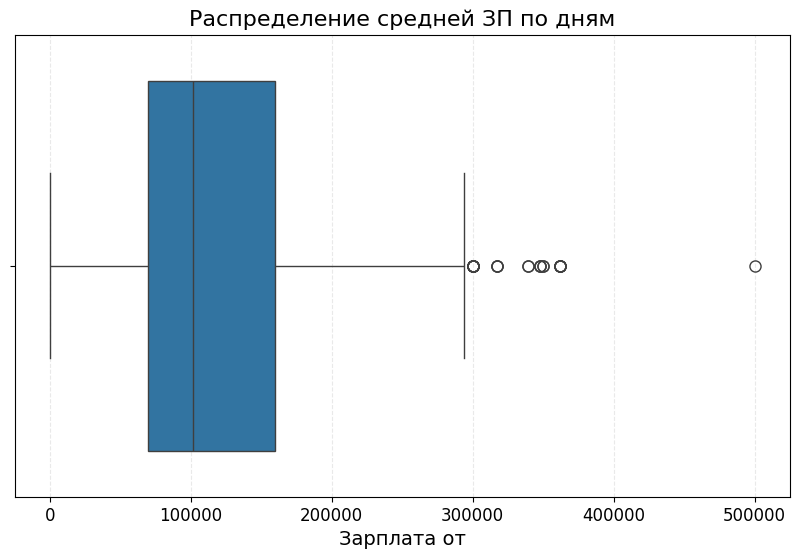

In [308]:
sns.boxplot(data = hh_df, x='salary_from')
capture_figures('Распределение средней ЗП по дням', xlabel='Зарплата от')

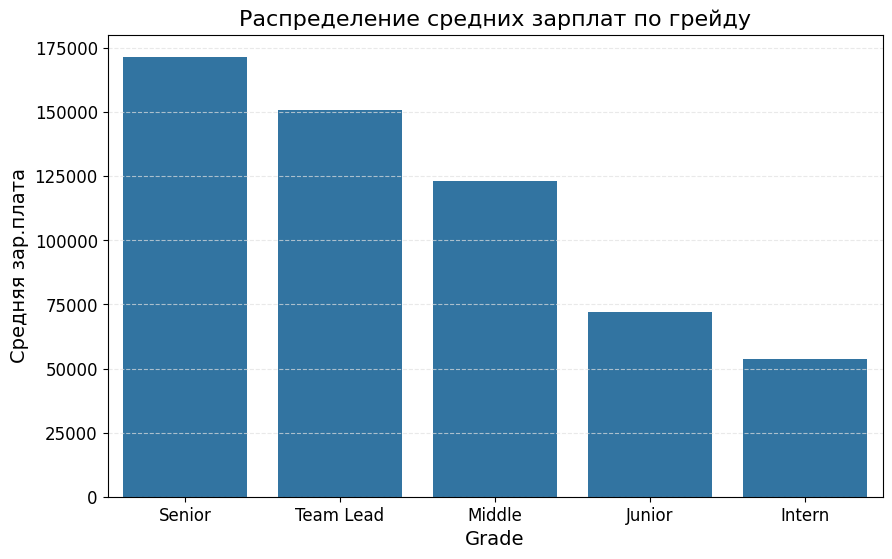

In [309]:
grade_salary = hh_df.groupby(['grade']).agg(
    mean_salary = ('salary_from','mean'),
    median_salary = ('salary_from','median')
).reset_index().sort_values(by='mean_salary', ascending=False)


sns.barplot(data=grade_salary, y='mean_salary', x='grade')
capture_figures('Распределение средних зарплат по грейду', ylabel='Средняя зар.плата', xlabel='Grade')

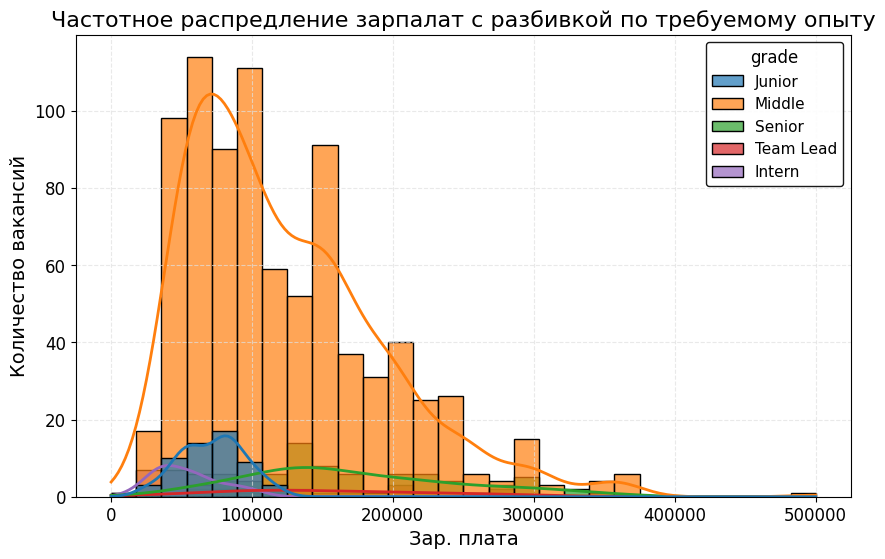

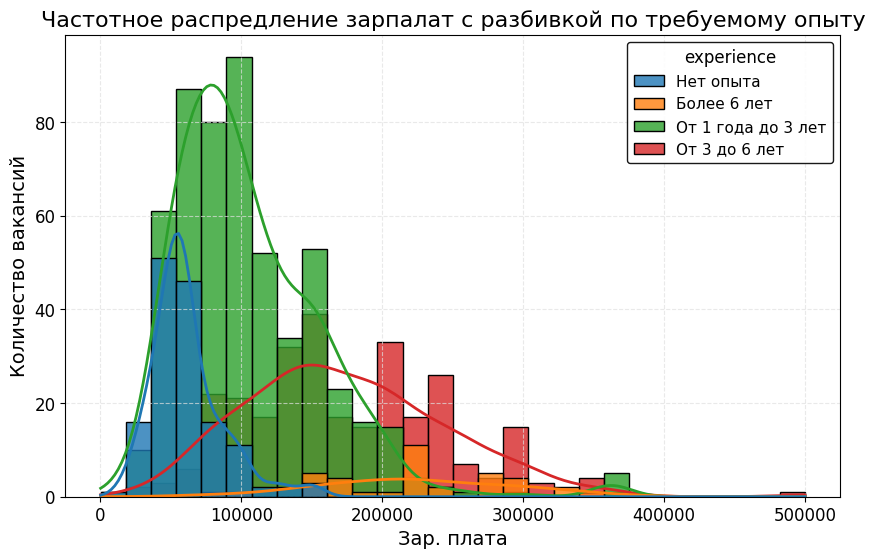

In [310]:
sns.histplot(data=hh_df, x='salary_from', hue='grade', kde=True,  alpha=0.7)
capture_figures('Частотное распредление зарпалат с разбивкой по требуемому опыту', ylabel='Количество вакансий',xlabel='Зар. плата')
sns.histplot(data=hh_df, x='salary_from', hue='experience', kde=True, alpha=0.8)
capture_figures('Частотное распредление зарпалат с разбивкой по требуемому опыту', ylabel='Количество вакансий',xlabel='Зар. плата')

In [311]:
hh_df.sample(1)

,vac_id,vac_name,grade,city,geo,geo_city,published_at,archived,employer_id,emp_name,addres,is_accredited,is_trusted,salary_from,salary_to,currency,gross,mode_name,frequency,prof_role,schedule_name,insider_interview,response_letter_required,experience,key_skills,has_test,url,parsed_for_job,j_date
1068,122704751,Ведущий аналитик данных Excel (офис),Senior,Челябинск,"[55.164325, 61.401889]","[55.1598408, 61.4025547]",2025-07-12 13:34:32+03:00,0,2748,Полная занятость,"Челябинск, Калининский район, улица Кирова, 161",0,1,59334.0,NaN,RUR,1,За месяц,,"BI-аналитик, аналитик данных",Полный день,,0,От 1 года до 3 лет,"MS Excel; Работа с системами аналитики; Банки,...",1,https://hh.ru/vacancy/122704751,Аналитик данных,2025-07-12


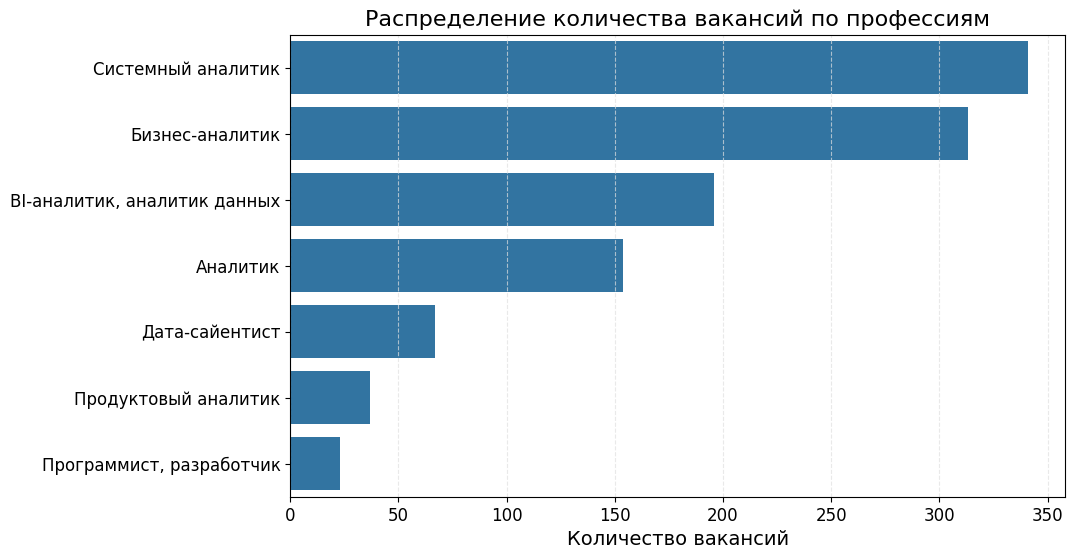

In [312]:
prof_role_salary = hh_df.groupby('prof_role').agg(
    vac_count = ('vac_id','count'),
    mean_salary = ('salary_from','mean'),
    median_salary = ('salary_from','median')
    ).reset_index().sort_values(by='vac_count', ascending=False).head(7)

sns.barplot(data=prof_role_salary, y='prof_role', x='vac_count' , orient='h')
capture_figures('Распределение количества вакансий по профессиям', xlabel='Количество вакансий')

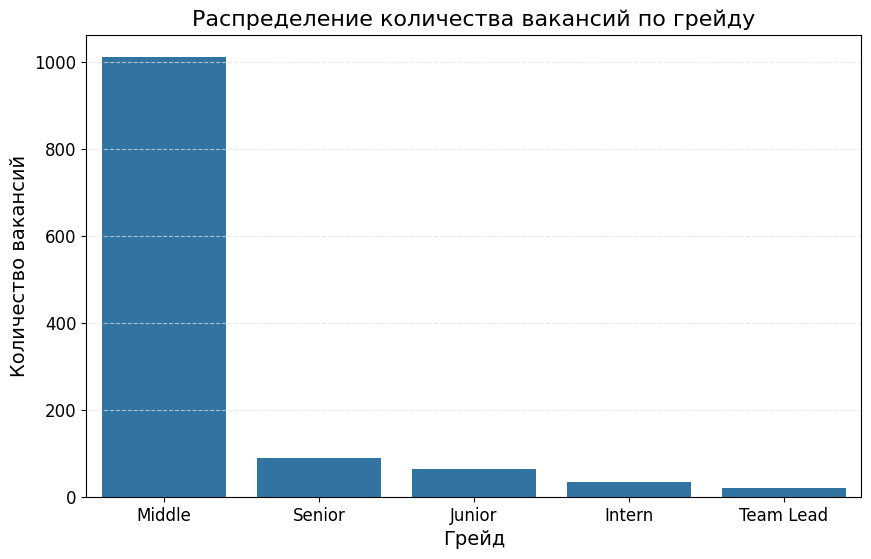

In [313]:
grade_salary = hh_df.groupby(['grade']).agg(
    vac_cnt = ('vac_id','count') ).reset_index().sort_values(by='vac_cnt', ascending=False)

sns.barplot(data=grade_salary, x='grade', y='vac_cnt')
capture_figures('Распределение количества вакансий по грейду', ylabel='Количество вакансий', xlabel='Грейд')

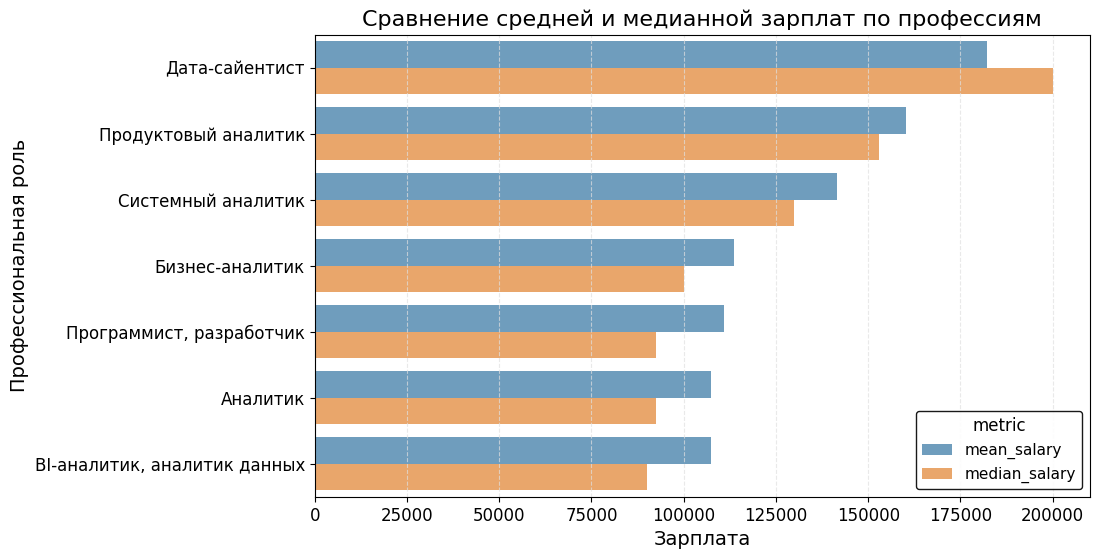

In [314]:
# Преобразуем данные в длинный формат
melted = prof_role_salary.melt(
    id_vars=['prof_role'], 
    value_vars=['mean_salary', 'median_salary'],
    var_name='metric',
    value_name='salary_value'
)

# Сортируем по средней зарплате (сохраняем порядок)
prof_role_order = prof_role_salary.sort_values('mean_salary', ascending=False)['prof_role']
melted['prof_role'] = pd.Categorical(melted['prof_role'], categories=prof_role_order, ordered=True)

sns.barplot(data=melted,y='prof_role', x='salary_value', hue='metric', orient='h', alpha=0.7, palette=['#1f77b4', '#ff7f0e'])

capture_figures(
    'Сравнение средней и медианной зарплат по профессиям', 
    xlabel='Зарплата', 
    ylabel='Профессиональная роль')


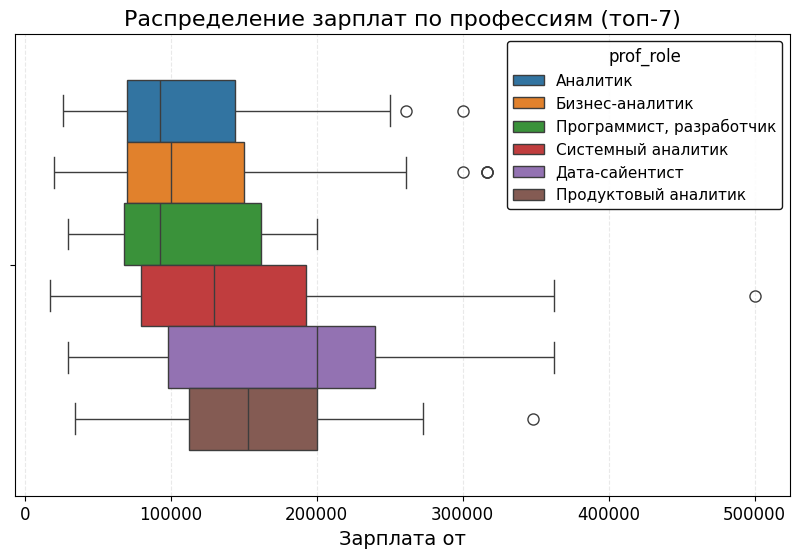

In [315]:
p_role = ['Дата-сайентист',
'Продуктовый аналитик',
'Системный аналитик',
'Бизнес-аналитик',
'Программист, разработчик',
'Аналитик',
'BI-аналитик',
'аналитик данных']

sns.boxplot(data=hh_df[hh_df['prof_role'].isin(p_role)], x='salary_from', hue='prof_role')
capture_figures('Распределение зарплат по профессиям (топ-7)', xlabel='Зарплата от')

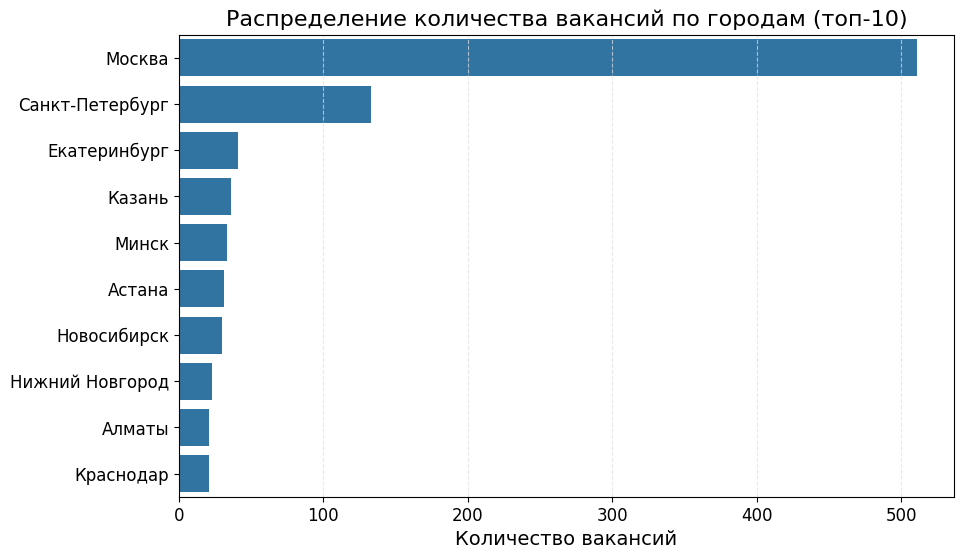

In [316]:
hh_df.groupby('city').agg(
    vac_in_city = ('vac_id','count')
    ).reset_index().sort_values(by='vac_in_city', ascending=False).head(10)

sns.barplot(data=hh_df.groupby('city').agg(
    vac_in_city = ('vac_id','count')
    ).reset_index().sort_values(by='vac_in_city', ascending=False).head(10), y='city', x='vac_in_city', orient='h')

capture_figures('Распределение количества вакансий по городам (топ-10)', xlabel='Количество вакансий')
plt.show()

# Распределение скилов по вакансиям

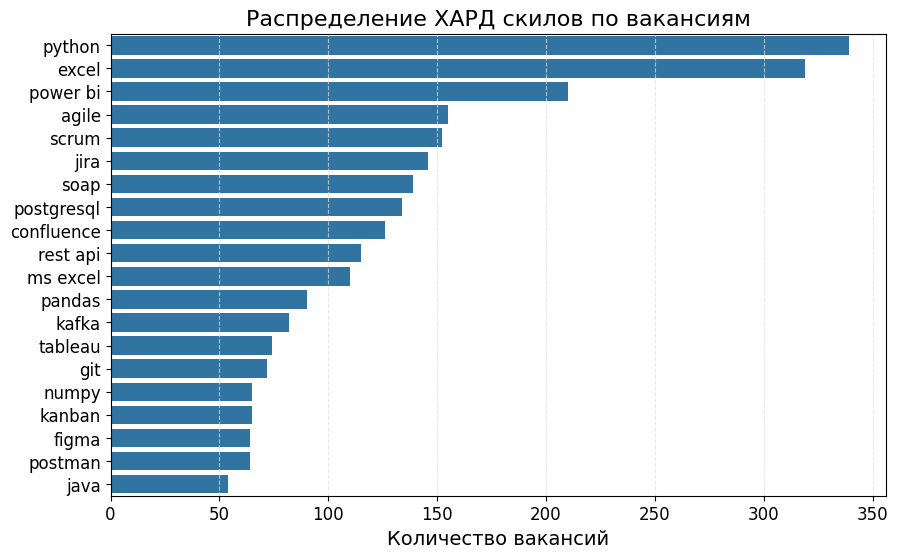

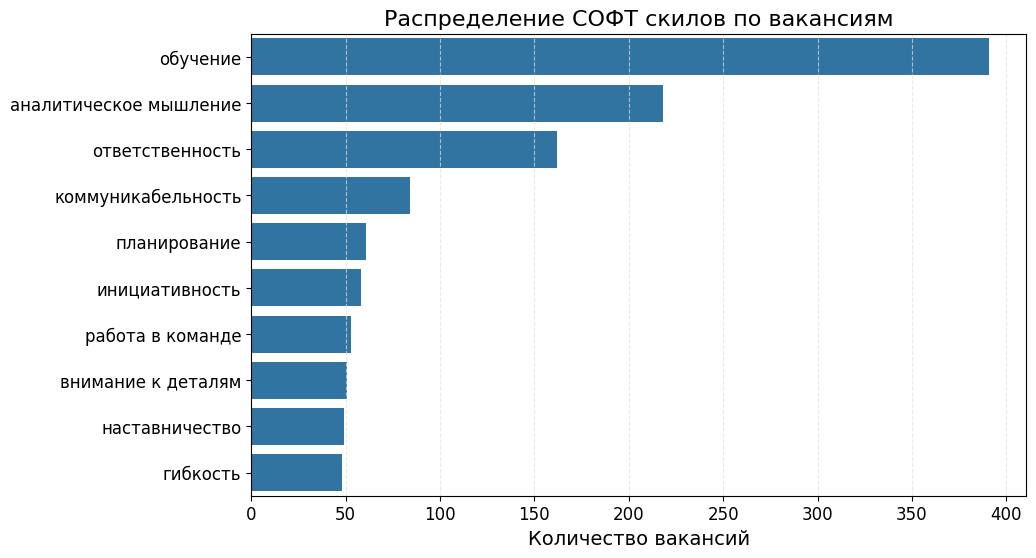

In [317]:
from utils.skills_extractor import SkillsExtractor

ske = SkillsExtractor()
soft_skills = ske.soft_skills
tech_skills = ske.tech_skills

hh_df_copy = hh_df.loc[:, ['vac_id','key_skills']]
hh_df_copy['key_skills_exploded'] = hh_df_copy.key_skills.str.split(';')
hh_df_copy = hh_df_copy.explode('key_skills_exploded', ignore_index=True)

skill_rating = hh_df.key_skills.str.split(';').explode().value_counts().reset_index().head(20)
hh_df_copy['hard_skills'] = hh_df_copy.key_skills_exploded.apply(lambda x: x.lower().strip() if any(skill  in x.lower().strip() for skill in tech_skills) else np.nan)
hh_df_copy['soft_skills'] = hh_df_copy.key_skills_exploded.apply(lambda x: x.lower().strip() if any(skill  in x.lower().strip() for skill in soft_skills) else np.nan)

hard_rating = hh_df_copy.groupby(['hard_skills']).agg(
    vac_cnt = ('vac_id','count')
).reset_index().sort_values(by='vac_cnt', ascending=False).head(20)

soft_rating = hh_df_copy.groupby(['soft_skills']).agg(
    vac_cnt = ('vac_id','count')
).reset_index().sort_values(by='vac_cnt', ascending=False).head(10)

sns.barplot(data=hard_rating, y='hard_skills', x='vac_cnt', orient='h')
capture_figures('Распределение ХАРД скилов по вакансиям', xlabel='Количество вакансий')
sns.barplot(data=soft_rating, y='soft_skills', x='vac_cnt', orient='h')
capture_figures('Распределение СОФТ скилов по вакансиям', xlabel='Количество вакансий')

# Стат. 

In [318]:
from scipy import stats as st
import pingouin as pg

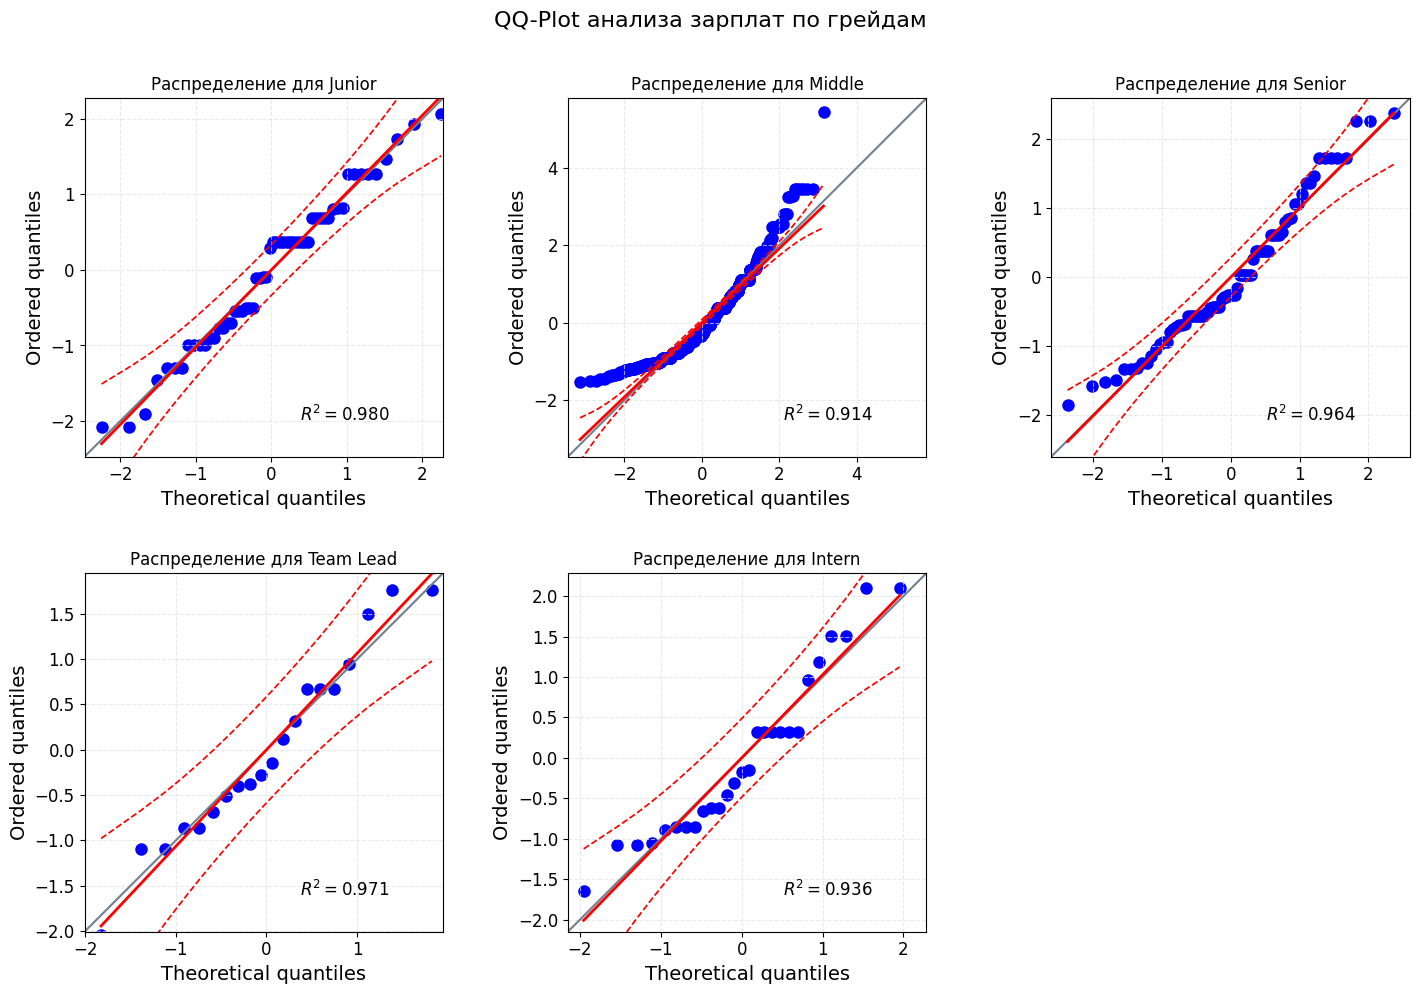

In [319]:
grade_list = hh_df.grade.unique().tolist()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axes_flat = axes.flatten()

for i, grade in enumerate(grade_list):
    data = hh_df.query(f'grade == "{grade}"').salary_from
    
    pg.qqplot(data, ax=axes_flat[i])
    axes_flat[i].set_title(f'Распределение для {grade}', fontsize=12)
    
    line = axes_flat[i].get_lines()[1]
    line.set_color('red')
    line.set_linewidth(2)

axes_flat[-1].axis('off')

plt.tight_layout(pad=3.0)
plt.suptitle('QQ-Plot анализа зарплат по грейдам', fontsize=16, y=1.02)
plt.show()

In [320]:
#тестирование на нормальное распределение ЗП между grade
pg.normality(data=hh_df, dv='salary_from', group='grade')

,W,pval,normal
grade,,,
Junior,0.974458,2.788499e-01,True
Middle,0.913941,2.770743e-21,False
Senior,0.959169,1.445387e-02,False
Team Lead,0.965054,6.489017e-01,True
Intern,0.927933,6.150914e-02,True


In [321]:
pg.kruskal(data=hh_df, dv='salary_from', between='grade')

,Source,ddof1,H,p-unc
Kruskal,grade,4,113.724637,1.167897e-23


Внутри зарплат разных грейдов наблюдаются стат.значимые различия p_value < 0.05